Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from icecream import ic
import pandas as pd
import seaborn as sns

In [2]:
def fitness(num):
    return sum(b == '1' for b in f'{num:b}')

def gray(n):
    return (f"{i^(i>>1):0{n}b}" for i in range(0, 1 << n))

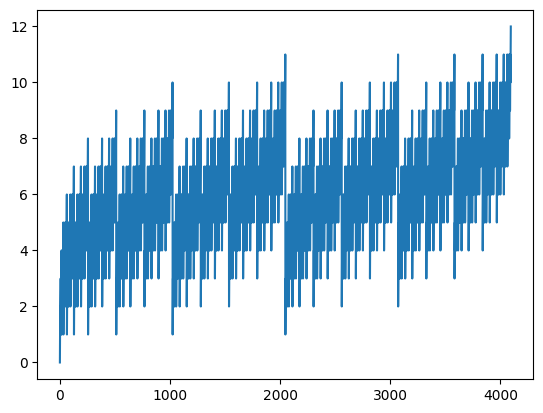

In [3]:
num_bits = 12
y = [fitness(g) for g in range(2**num_bits)]
plt.plot(y)

In [4]:
from sklearn.manifold import TSNE
X = np.array([[int(_) for _ in f'{g:0{num_bits}b}'] for g in range(2**num_bits)])
y = np.array(y)
tsne_em = TSNE(n_components=2).fit_transform(X)

In [5]:
data = pd.DataFrame()
data['x'] = tsne_em[:,0]
data['y'] = tsne_em[:,1]
data['f'] = [fitness(n) for n in range(2**num_bits)]

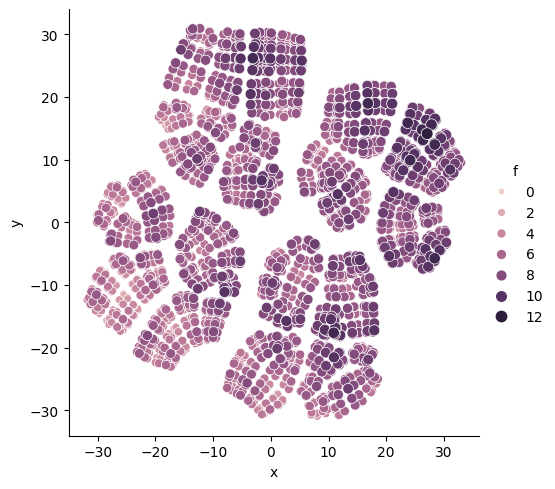

In [6]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(
    data=data,
    x='x', y='y',
    hue='f', size='f',
    #palette=cmap, 
    #sizes=(2, 200),
)